In [14]:
# --- libs
from PIL import Image
from easydict import EasyDict
import os
import json
from PIL import Image
import numpy as np 
Image.MAX_IMAGE_PIXELS = 933120000

from patchify import patchify,unpatchify
import matplotlib.pyplot as plt

args = EasyDict()

In [9]:
sample_img =  Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")
sample_img = np.asarray(sample_img) 


# splitting the image into patches
image_height, image_width, channel_count = sample_img.shape
patch_height, patch_width, step = 200, 200, 200
patch_shape = (patch_height, patch_width, channel_count)

patches = patchify(sample_img, (patch_height,patch_width,4), step=step)
print(patches.shape)

(5, 5, 1, 200, 200, 4)


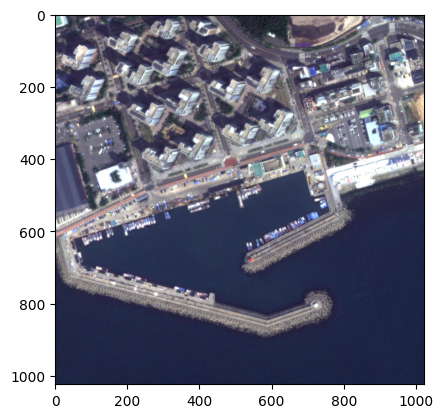

In [10]:
plt.imshow(sample_img)

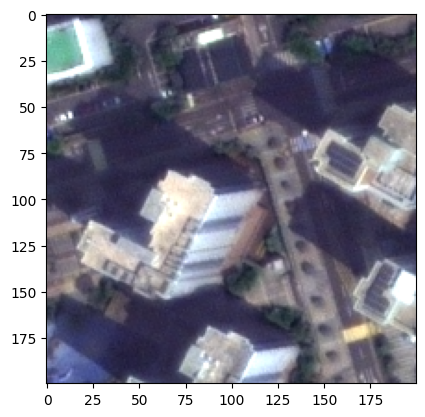

In [11]:
plt.imshow(patches[0][0][0])

In [12]:
# convert alpha to 0

p1 = np.array(patches[0][0][0])
for i in range(p1.shape[0]):
    for k in range(p1.shape[1]):
 
        p1[i][k][3] = 0
        

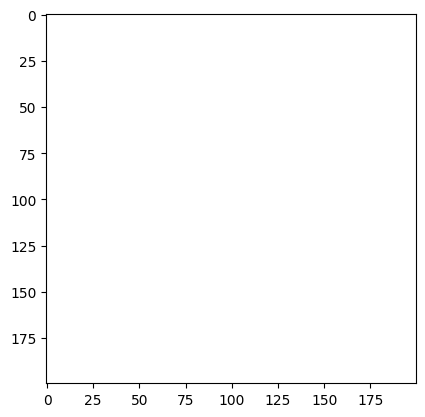

In [13]:
plt.imshow(p1)

In [45]:
sample_img =  Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")
sample_img = np.asarray(sample_img) 


# splitting the image into patches
image_height, image_width, channel_count = sample_img.shape
patch_height, patch_width, step = 200, 200, 200
patch_shape = (patch_height, patch_width, channel_count)

patches = patchify(sample_img, (patch_height,patch_width,channel_count), step=step)
print(patches.shape)


def process(patch):
    p1 = np.array(patch)
    for i in range(p1.shape[0]):
        for k in range(p1.shape[1]):
            
            #---- filtering
            pixel_ = p1[i][k] 
            if pixel_[0] ==0 and pixel_[1] ==0 and pixel_[2] ==0:
                p1[i][k][3] = 0

    return p1


def measure_patch(patch):
    
    print(patch.shape)
    p1 = np.array(patch)
    p1_size = (patch.shape[0],patch.shape[1])
    print(p1_size)
    total = p1_size[0] * p1_size[1]
    black_cnt = 0

    for row in range(p1_size[0]):
        for col in range(p1_size[1]):
            pixel_ = p1[row][col]
            r,g,b = pixel_[0],pixel_[1],pixel_[2] 
            if r==0 and g==0 and b==0:
                black_cnt +=1
    ratio = black_cnt / total
    
    return ratio


#------------------
thres = 0.2

# processing each patch
output_patches = np.empty(patches.shape).astype(np.uint8)
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j, 0] 

        # check the black ratio
        ratio_ = measure_patch(patch)
        if ratio_ > thres:
            out_= process(patch)
        else:
            out_= patch 
        output_patches[i, j, 0] = out_


(5, 5, 1, 200, 200, 4)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)
(200, 200, 4)
(200, 200)


In [38]:

# merging back patches
output_height = image_height - (image_height - patch_height) % step
output_width = image_width - (image_width - patch_width) % step
output_shape = (output_height, output_width, channel_count)
output_image = unpatchify(output_patches, output_shape)
output_image = Image.fromarray(output_image)
#output_image.save("output.jpg")

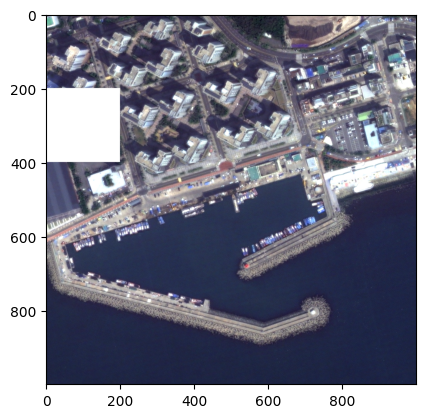

In [39]:
plt.imshow(output_image)

In [8]:
# merging 

# processing each patch
output_patches = np.empty(patches.shape).astype(np.uint8)

In [ ]:
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j, 0]
        output_patch = process(patch)  # process the patch
        output_patches[i, j, 0] = output_patch

# merging back patches
output_height = image_height - (image_height - patch_height) % step
output_width = image_width - (image_width - patch_width) % step
output_shape = (output_height, output_width, channel_count)
output_image = unpatchify(output_patches, output_shape)
output_image = Image.fromarray(output_image)
output_image.save("output.jpg")

# Test

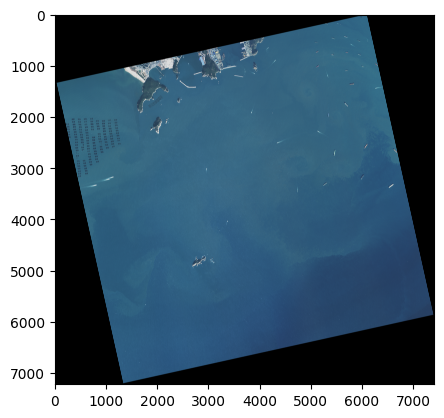

In [54]:
sample_img =  Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png")
plt.imshow(sample_img)


In [92]:
sample_img = np.asarray(sample_img) 

# splitting the image into patches
image_height, image_width, channel_count = sample_img.shape

common_param = 100
patch_height, patch_width, step = common_param,common_param, common_param
patch_shape = (patch_height, patch_width, channel_count)

patches = patchify(sample_img, (patch_height,patch_width,channel_count), step=step)
print(patches.shape)


def process(patch):
    p1 = np.array(patch)
    for i in range(p1.shape[0]):
        for k in range(p1.shape[1]):
            
            #---- filtering
            pixel_ = p1[i][k] 
            if pixel_[0] ==0 and pixel_[1] ==0 and pixel_[2] ==0:
                p1[i][k][3] = 0

    return p1


def measure_patch(patch):
    
    #print(patch.shape)
    p1 = np.array(patch)
    p1_size = (patch.shape[0],patch.shape[1])
    #print(p1_size)
    total = p1_size[0] * p1_size[1]
    black_cnt = 0

    for row in range(p1_size[0]):
        for col in range(p1_size[1]):
            pixel_ = p1[row][col]
            r,g,b = pixel_[0],pixel_[1],pixel_[2] 
            if r==0 and g==0 and b==0:
                black_cnt +=1
    #ratio = black_cnt / total
    
    return black_cnt


#------------------
thres = 10
#-----------------

# processing each patch
output_patches = np.empty(patches.shape).astype(np.uint8)
total_n_pathces = output_patches.shape[0] * output_patches.shape[1]
print("Total # of patches : ", total_n_pathces)
cnt =0 
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j, 0] 

        # check the black ratio
        black_count = measure_patch(patch)
        if black_count > thres:
            out_= process(patch)
        else:
            out_= patch 
        output_patches[i, j, 0] = out_

        cnt+=1
        
        print(f"Progress : {cnt} out of {total_n_pathces}")


(72, 74, 1, 100, 100, 4)
Total # of patches :  5328
Progress : 1 out of 5328
Progress : 2 out of 5328
Progress : 3 out of 5328
Progress : 4 out of 5328
Progress : 5 out of 5328
Progress : 6 out of 5328
Progress : 7 out of 5328
Progress : 8 out of 5328
Progress : 9 out of 5328
Progress : 10 out of 5328
Progress : 11 out of 5328
Progress : 12 out of 5328
Progress : 13 out of 5328
Progress : 14 out of 5328
Progress : 15 out of 5328
Progress : 16 out of 5328
Progress : 17 out of 5328
Progress : 18 out of 5328
Progress : 19 out of 5328
Progress : 20 out of 5328
Progress : 21 out of 5328
Progress : 22 out of 5328
Progress : 23 out of 5328
Progress : 24 out of 5328
Progress : 25 out of 5328
Progress : 26 out of 5328
Progress : 27 out of 5328
Progress : 28 out of 5328
Progress : 29 out of 5328
Progress : 30 out of 5328
Progress : 31 out of 5328
Progress : 32 out of 5328
Progress : 33 out of 5328
Progress : 34 out of 5328
Progress : 35 out of 5328
Progress : 36 out of 5328
Progress : 37 out of 

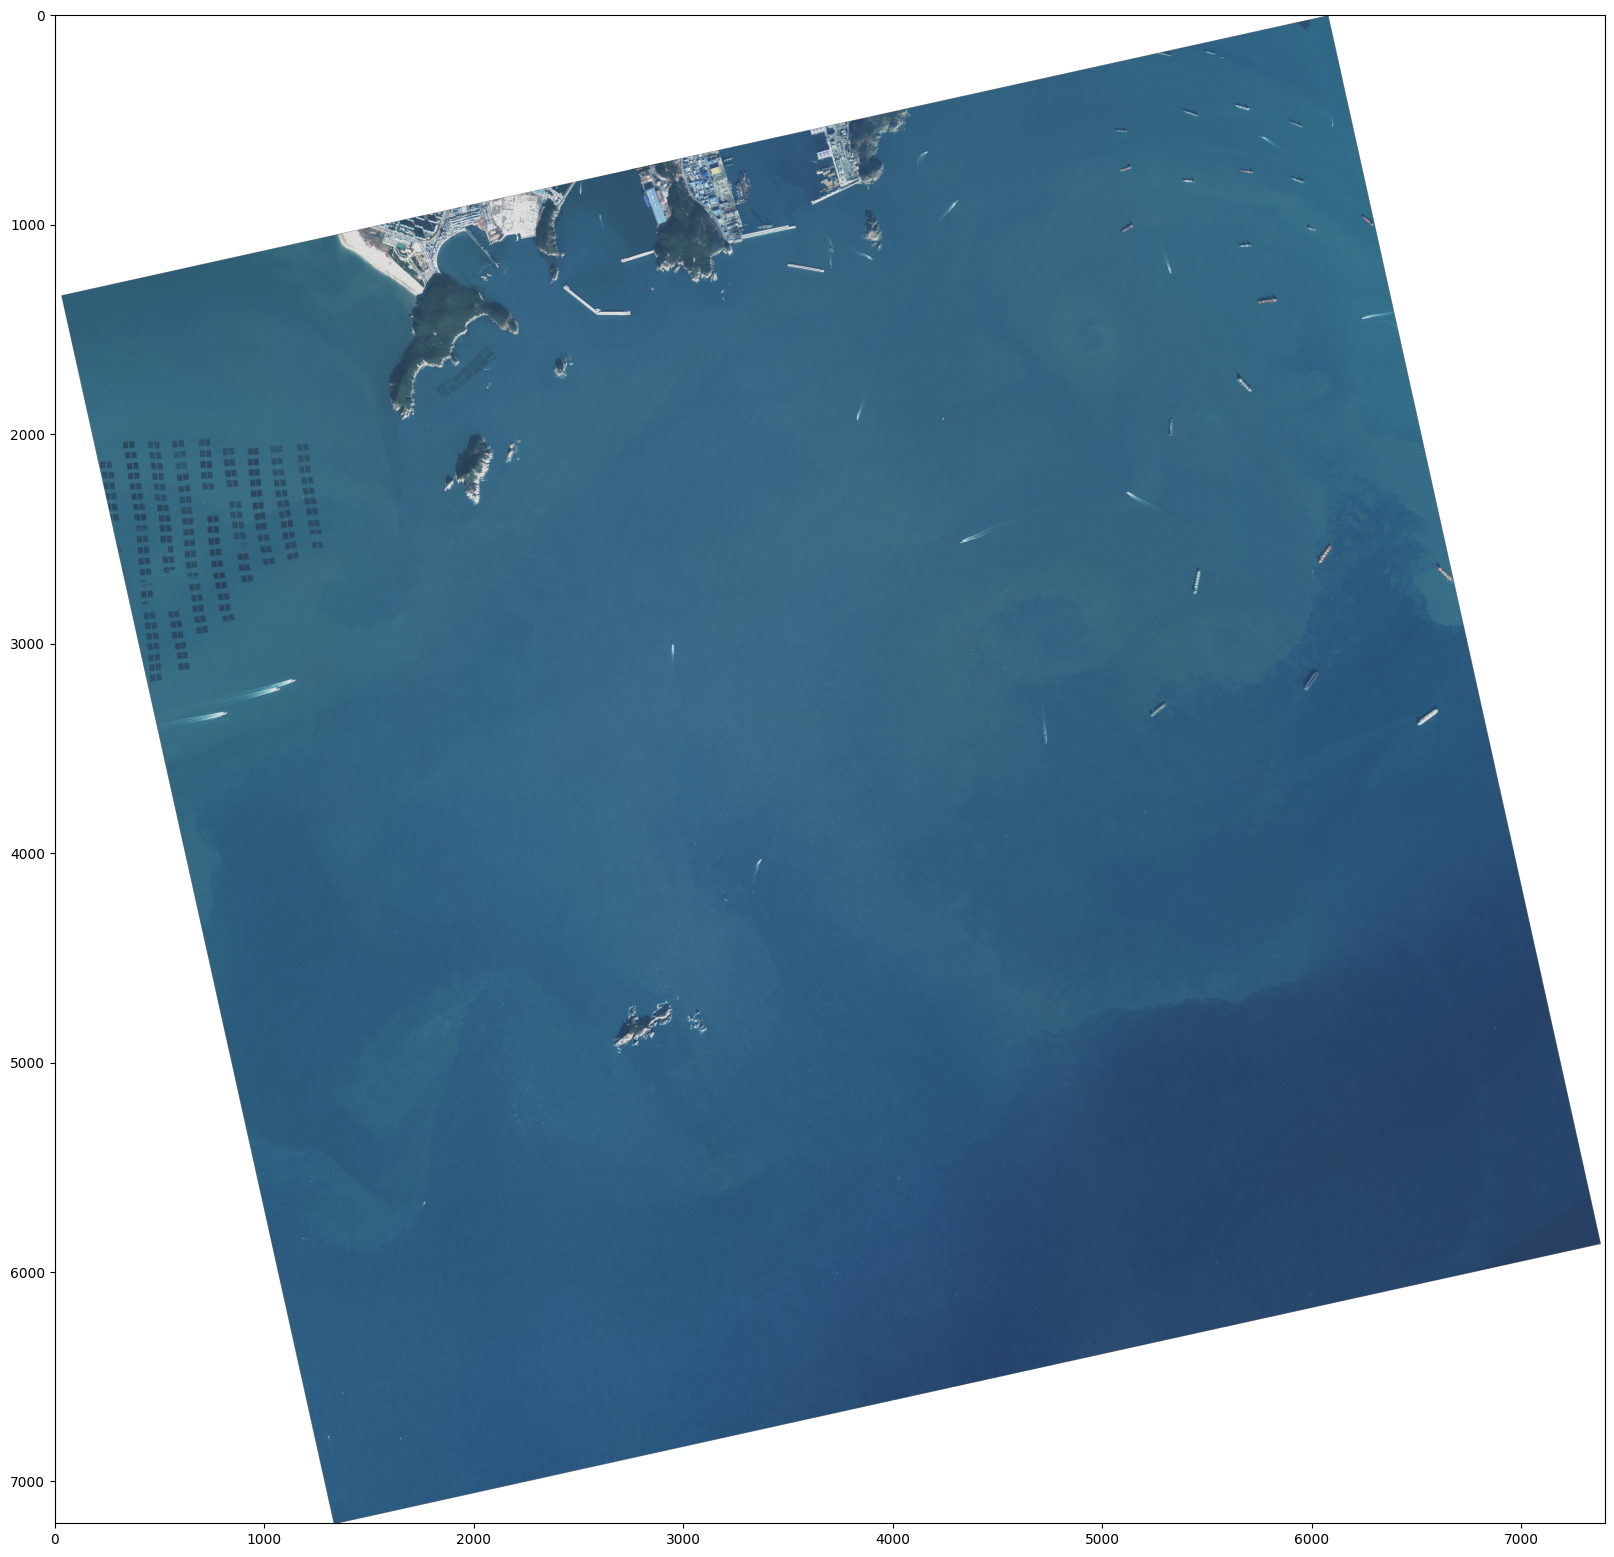

In [97]:
# merging back patches
output_height = image_height - (image_height - patch_height) % step
output_width = image_width - (image_width - patch_width) % step
output_shape = (output_height, output_width, channel_count)
output_image = unpatchify(output_patches, output_shape)
output_image = Image.fromarray(output_image)
output_image.save("output_1.png",compress_level=0)
plt.figure(figsize=(20,20))
plt.imshow(output_image)